In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("D:\\users\\User\\Downloads\\archive (15)\\sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
print(f'DF Shape is: {df.shape}')
print(f'DF Info is: {df.info()}')

DF Shape is: (732, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
DF Info is: None


In [6]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [9]:
df.describe(include='object')

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2022-07-17 06:15:00,WindWhisperer,Instagram,#Compassionate #TearsOfEmpathy,USA
freq,3,44,3,3,258,3,59


In [10]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [11]:
df.Platform.unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

In [12]:
df.Platform.value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

In [13]:
df['time'] = pd.to_datetime(df['Timestamp'])

df['Time'] = df['time'].dt.time
df['Date'] = df['time'].dt.date
df['Weekday'] = df['time'].dt.weekday
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,time,Time,Date,Weekday
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,2023-01-15 12:30:00,12:30:00,2023-01-15,6
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,2023-01-15 08:45:00,08:45:00,2023-01-15,6
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,2023-01-15 15:45:00,15:45:00,2023-01-15,6
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,2023-01-15 18:20:00,18:20:00,2023-01-15,6
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,2023-01-15 19:55:00,19:55:00,2023-01-15,6


In [14]:
df.drop(['Timestamp', 'time'], axis=1, inplace=True)

In [15]:
colors = plt.get_cmap('Accent').colors

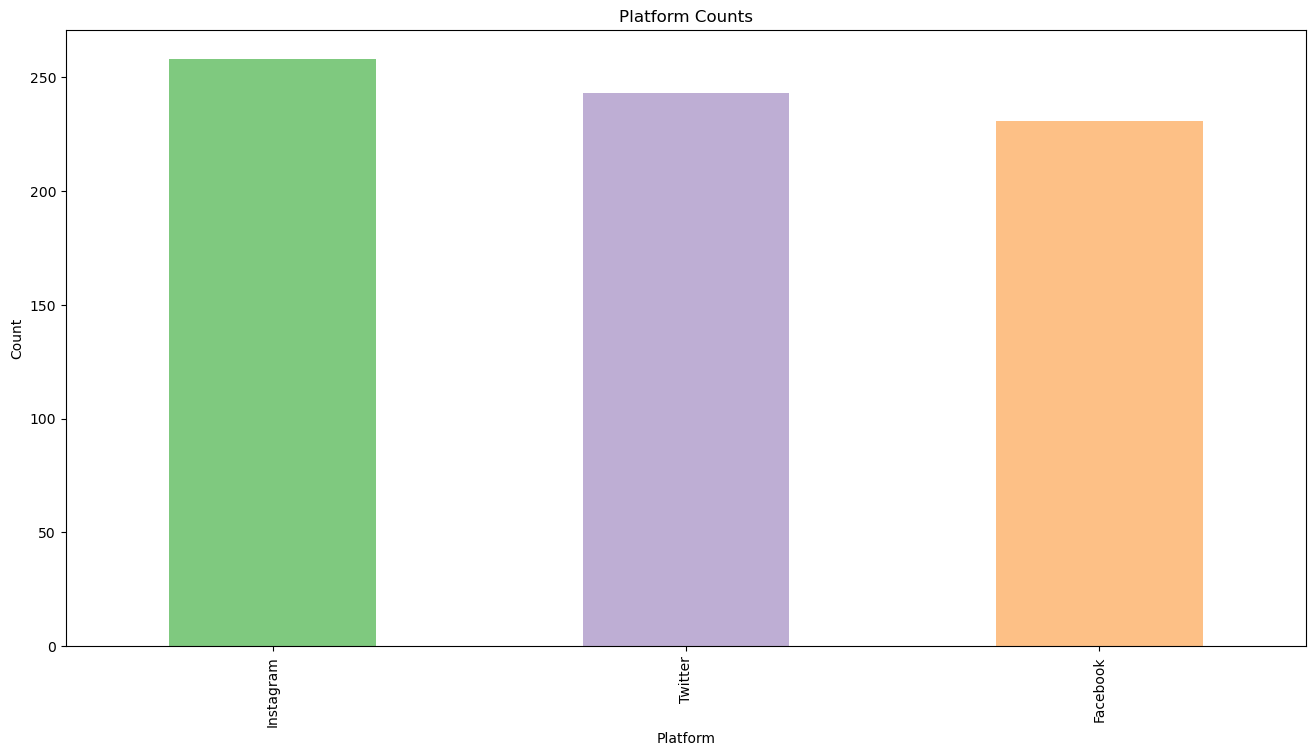

In [16]:
plt.figure(figsize=(16, 8))
df.Platform.value_counts().sort_values(ascending=False).plot(kind='bar', color=colors, xlabel='Platform', 
                                ylabel='Count', title='Platform Counts')

plt.show()

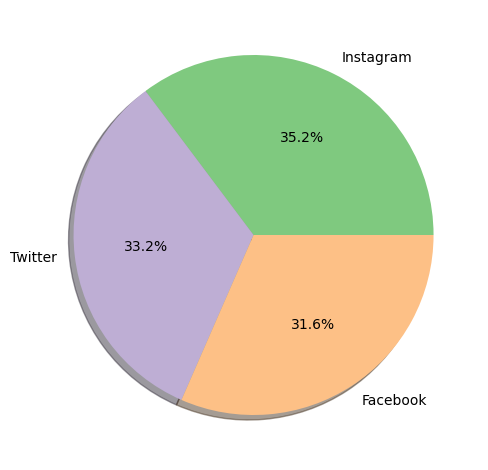

In [17]:
df.Platform.value_counts().sort_values(ascending=False).plot(kind='pie', ylabel='', 
                                        colors=colors, shadow=True, autopct='%1.1f%%', labeldistance=1.1)
plt.tight_layout()
plt.show()

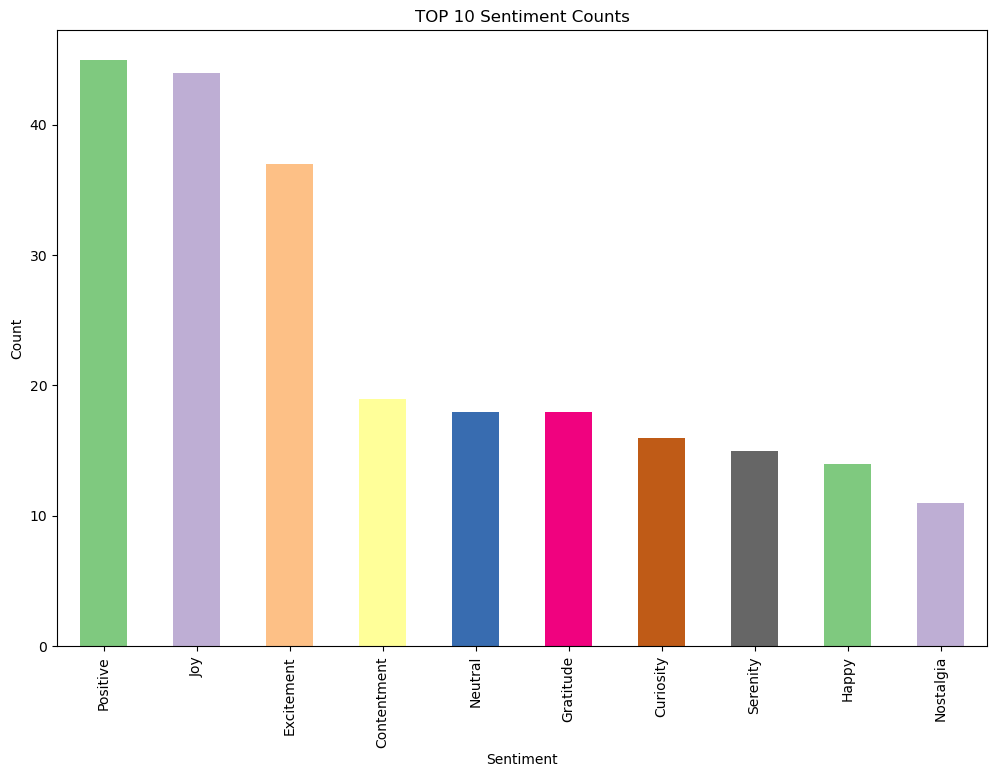

In [18]:
plt.figure(figsize=(12, 8))
df.Sentiment.value_counts().head(10).sort_values(ascending=False).plot(kind='bar', 
                                                  color=colors, xlabel='Sentiment', 
                                                  ylabel='Count', title='TOP 10 Sentiment Counts')

plt.show()

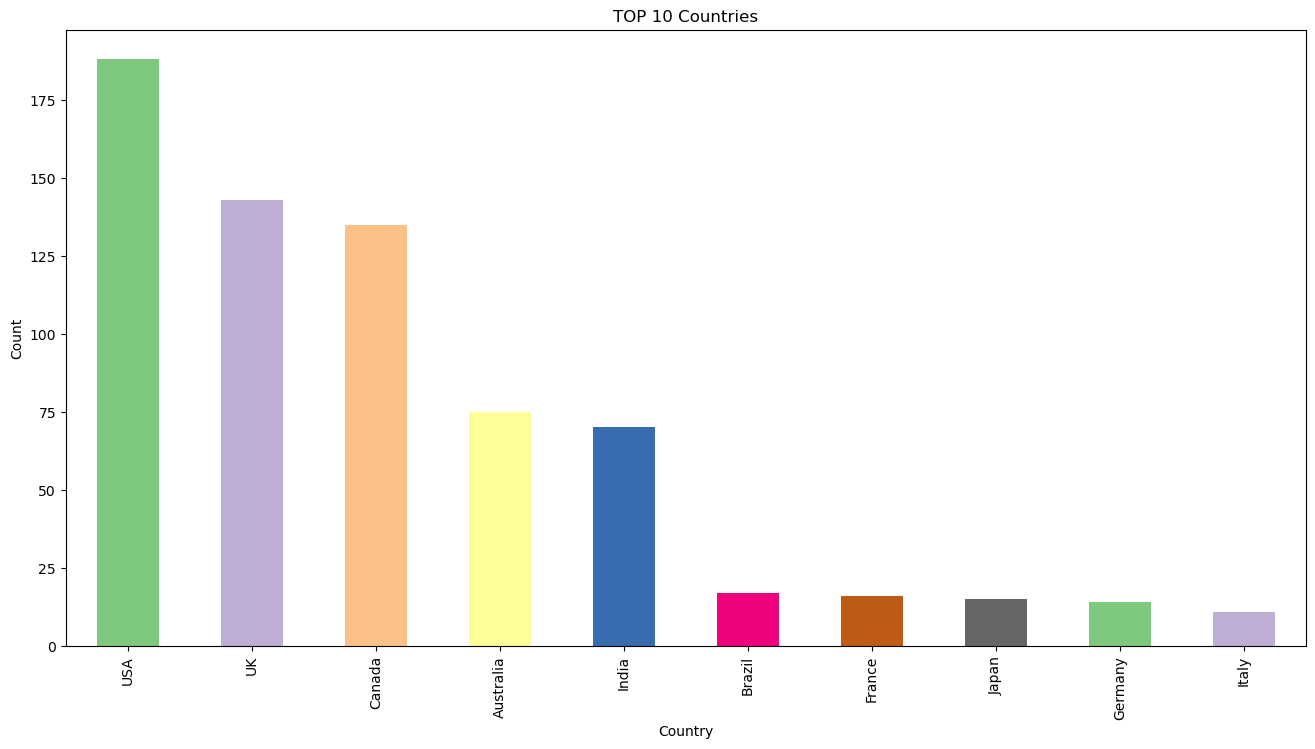

In [19]:
plt.figure(figsize=(16, 8))
df.Country.value_counts().nlargest(10).plot(kind='bar', color=colors, xlabel='Country', 
                                            ylabel='Count', title='TOP 10 Countries')
plt.show()

Visualizing Likes

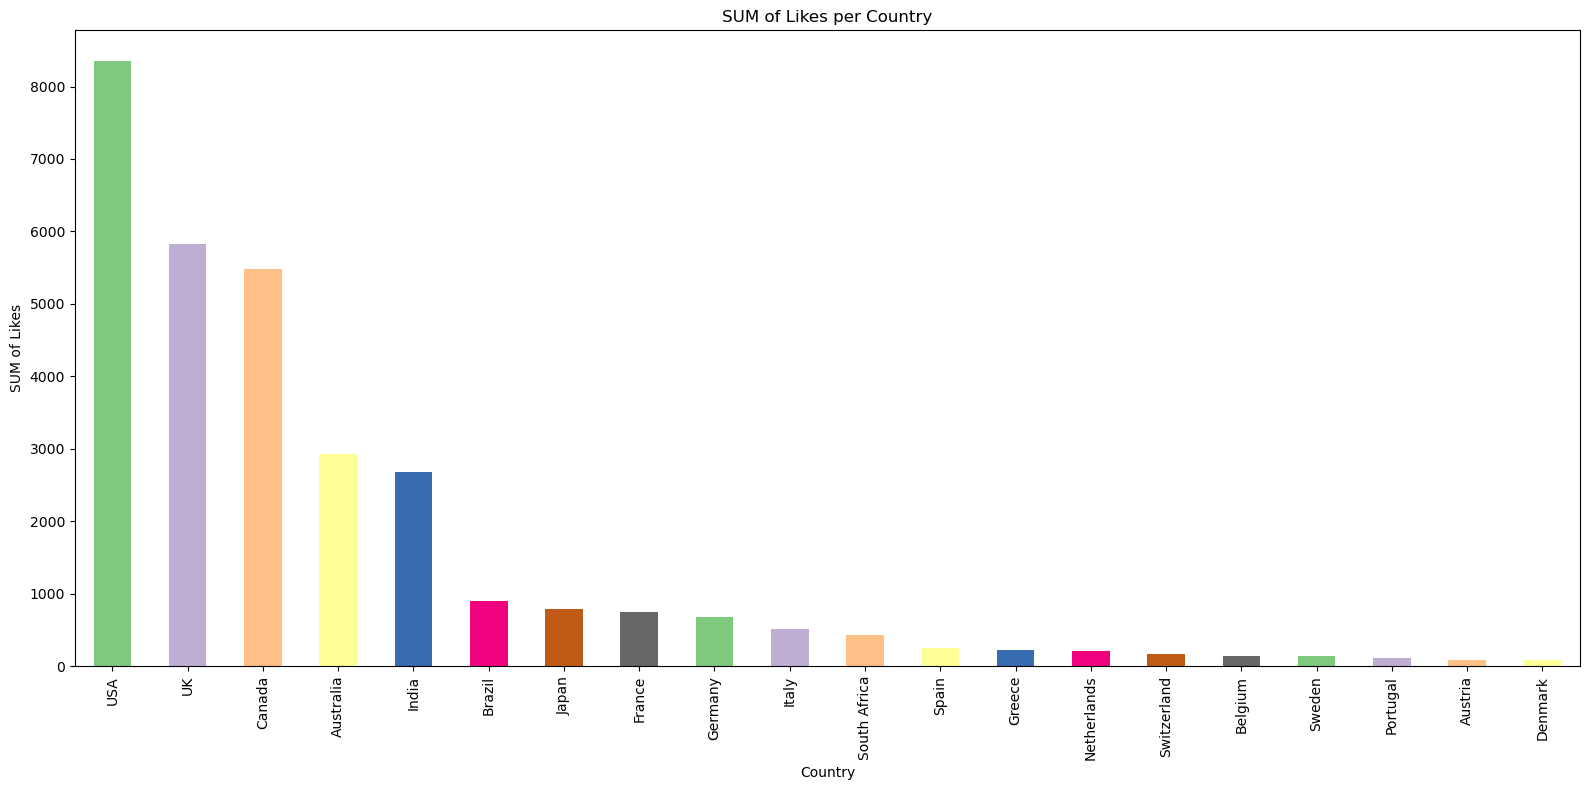

In [20]:
plt.figure(figsize=(16, 8))
df.groupby('Country')['Likes'].sum().sort_values(ascending=False).head(20).plot(kind='bar', 
                                        color=colors, xlabel='Country', 
                                        ylabel='SUM of Likes', title='SUM of Likes per Country')
plt.tight_layout()
plt.show()

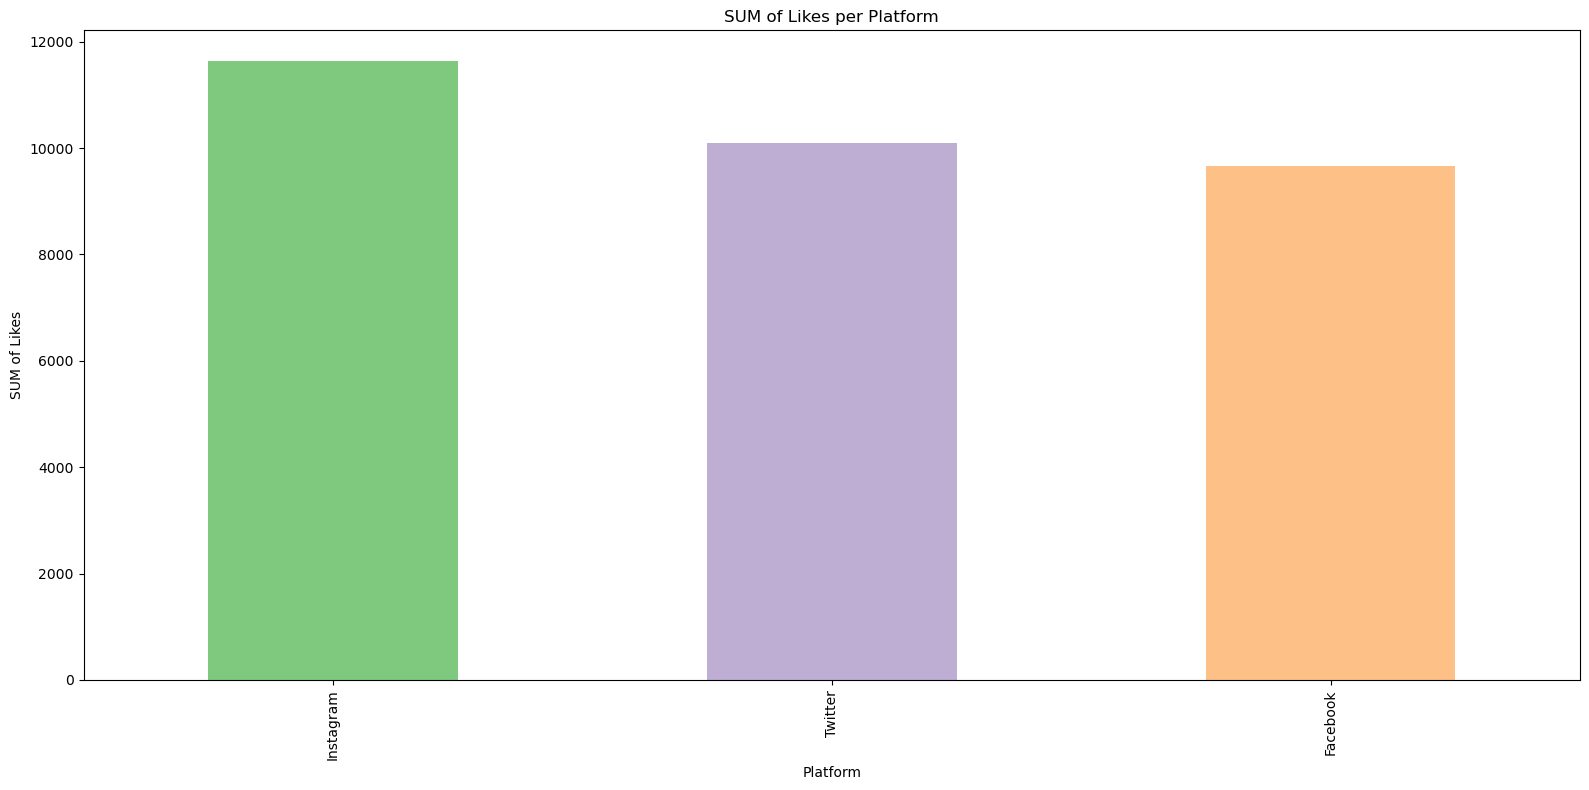

In [21]:
plt.figure(figsize=(16, 8))
df.groupby('Platform')['Likes'].sum().sort_values(ascending=False).plot(kind='bar', 
                                        color=colors, xlabel='Platform', 
                                        ylabel='SUM of Likes', title='SUM of Likes per Platform')
plt.tight_layout()
plt.show()

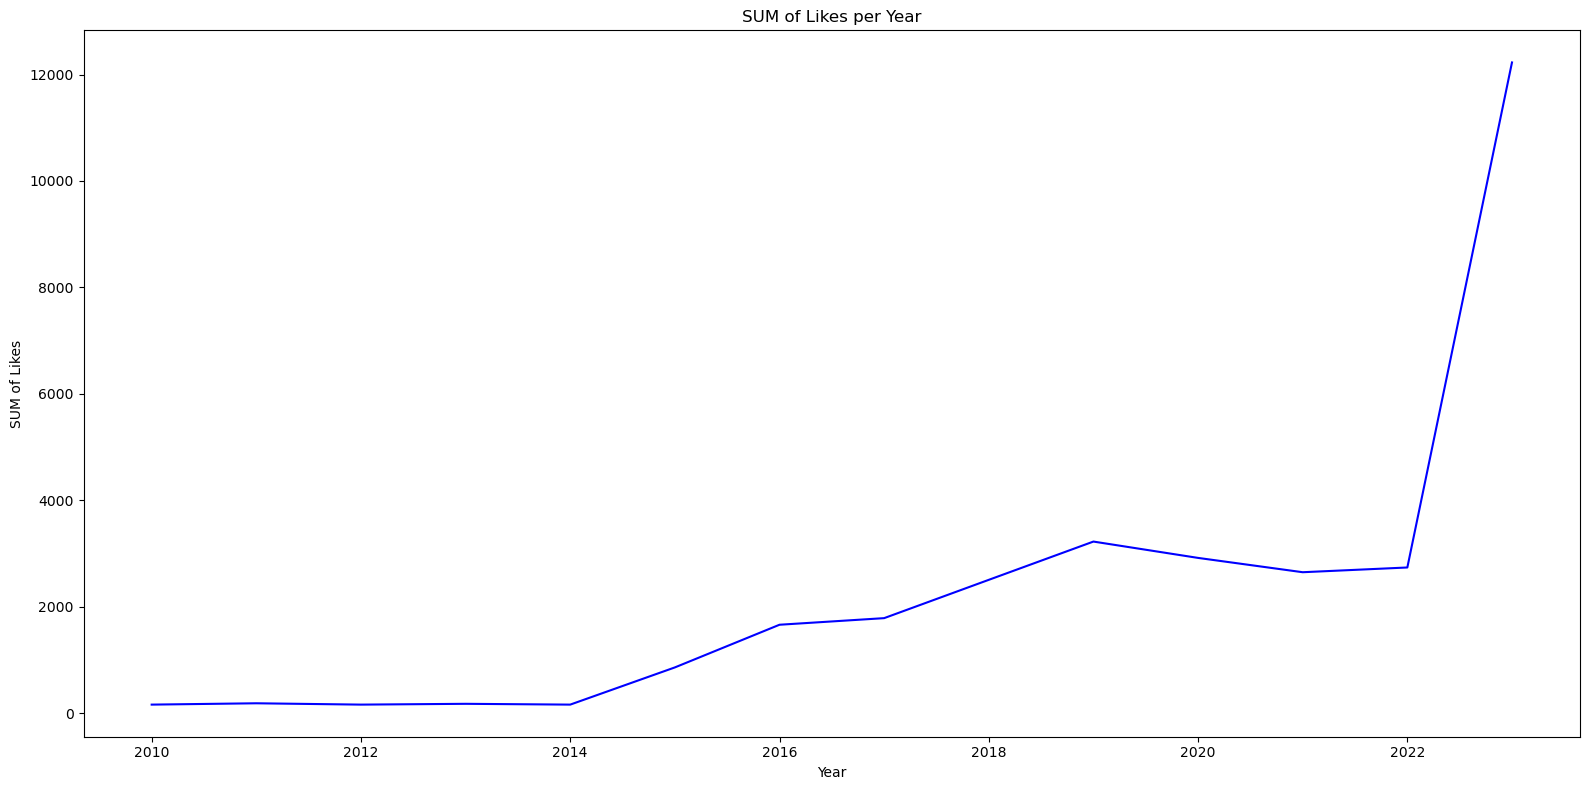

In [22]:
plt.figure(figsize=(16, 8))
df.groupby('Year')['Likes'].sum().sort_index().plot(kind='line', 
                                        color='blue', xlabel='Year', 
                                        ylabel='SUM of Likes', title='SUM of Likes per Year')
plt.tight_layout()
plt.show()

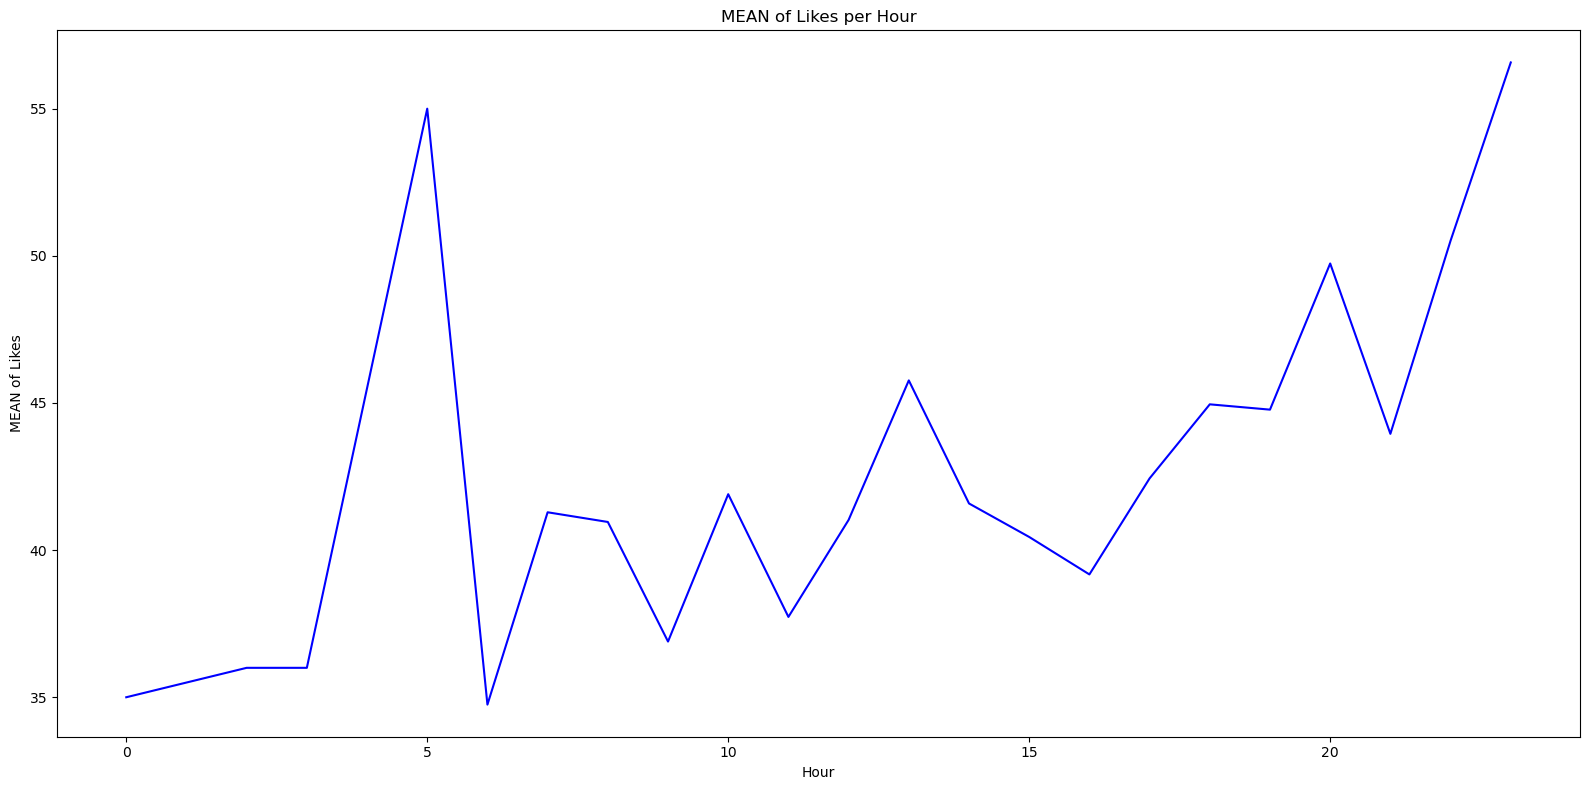

In [23]:
plt.figure(figsize=(16, 8))
df.groupby('Hour')['Likes'].mean().sort_index().plot(kind='line', 
                                        color='blue', xlabel='Hour', 
                                        ylabel='MEAN of Likes', title='MEAN of Likes per Hour')
plt.tight_layout()
plt.show()

Analyzing Hashtags and Retweets

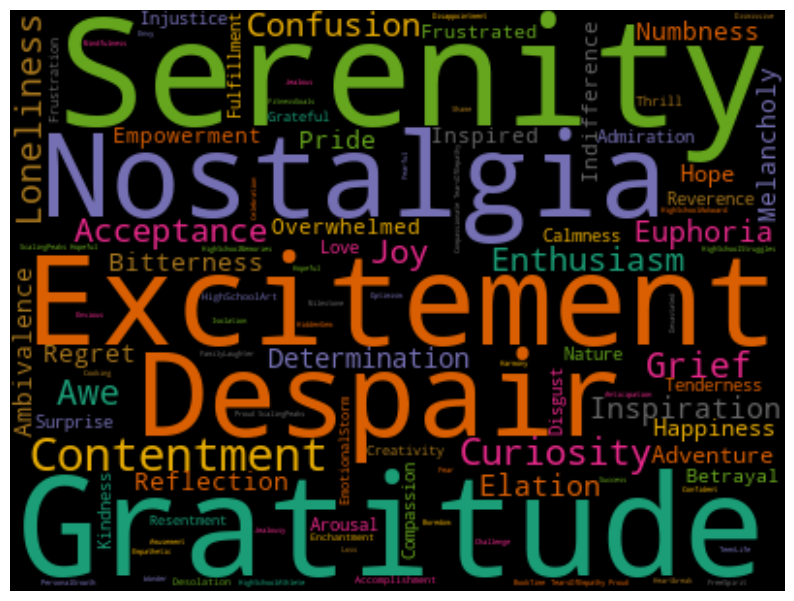

In [24]:
words = df.Hashtags.str.cat(sep='')
wc = WordCloud(width=400, height=300, max_words=100, colormap='Dark2').generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

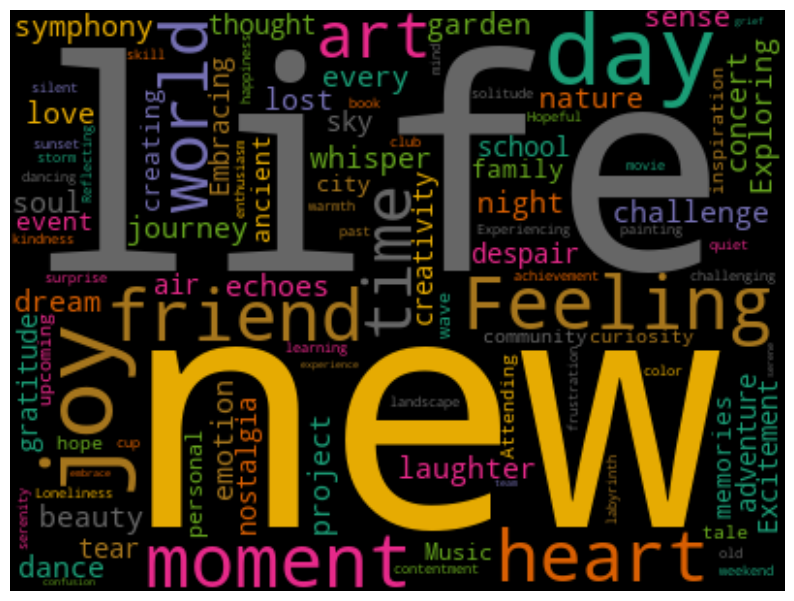

In [25]:
words = df.Text.str.cat(sep='')
wc = WordCloud(width=400, height=300, max_words=100, colormap='Dark2').generate(words)
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

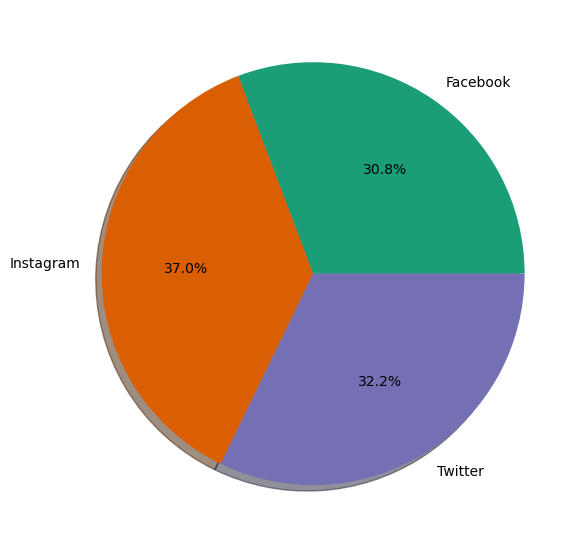

In [34]:
pl_retweets = df.groupby('Platform')['Retweets'].sum()
pl_pct = pl_retweets/pl_retweets.sum() * 100 
plt.figure(figsize=(6, 6))
plt.pie(
    pl_pct,
    labels=pl_pct.index,
    autopct='%1.1f%%', 
    colors=plt.get_cmap('Dark2').colors,  
    shadow=True,   
)
plt.tight_layout()
plt.show()

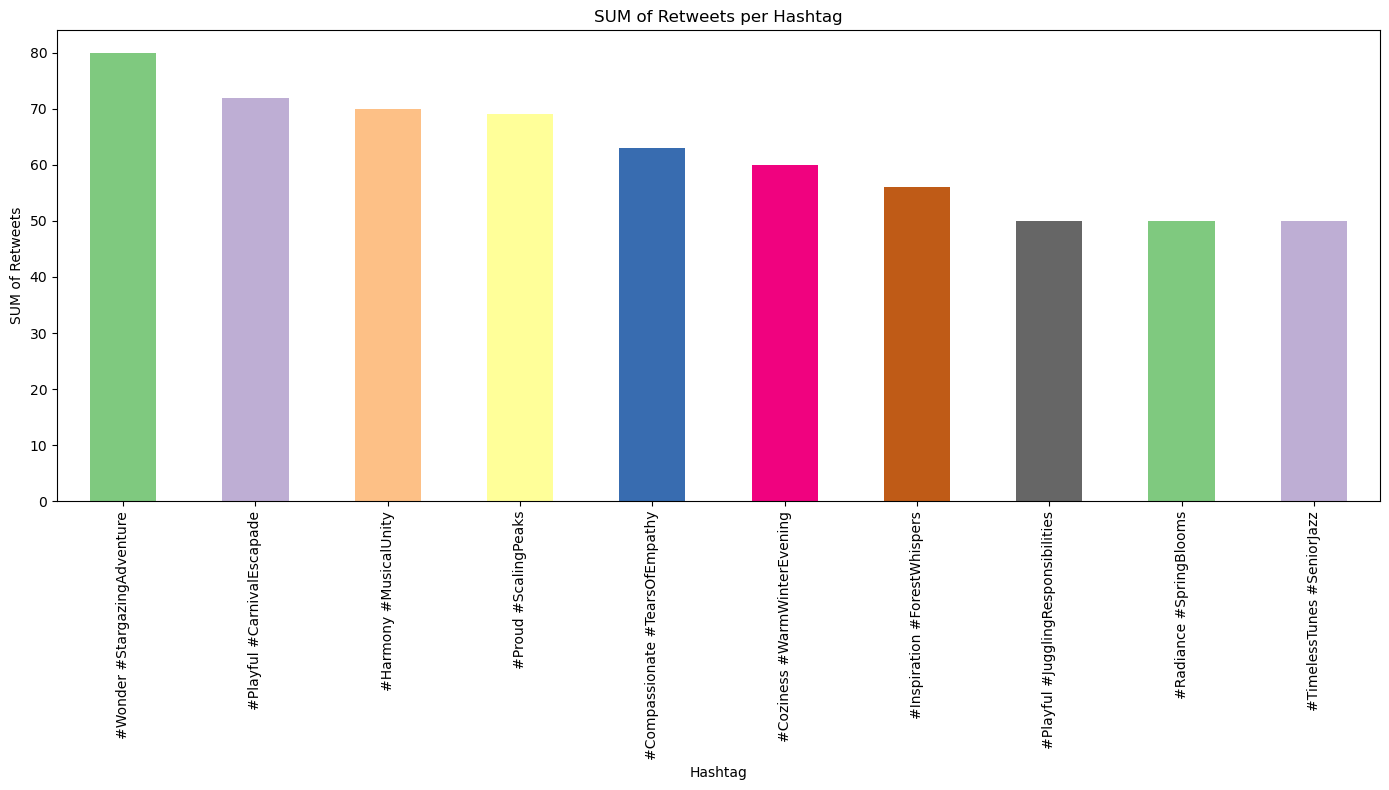

In [27]:
plt.figure(figsize=(14, 8))
df.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color=colors, 
                                                  xlabel='Hashtag', ylabel='SUM of Retweets', title='SUM of Retweets per Hashtag')
plt.tight_layout()
plt.show()

Hashtags and Retweets from different Platforms

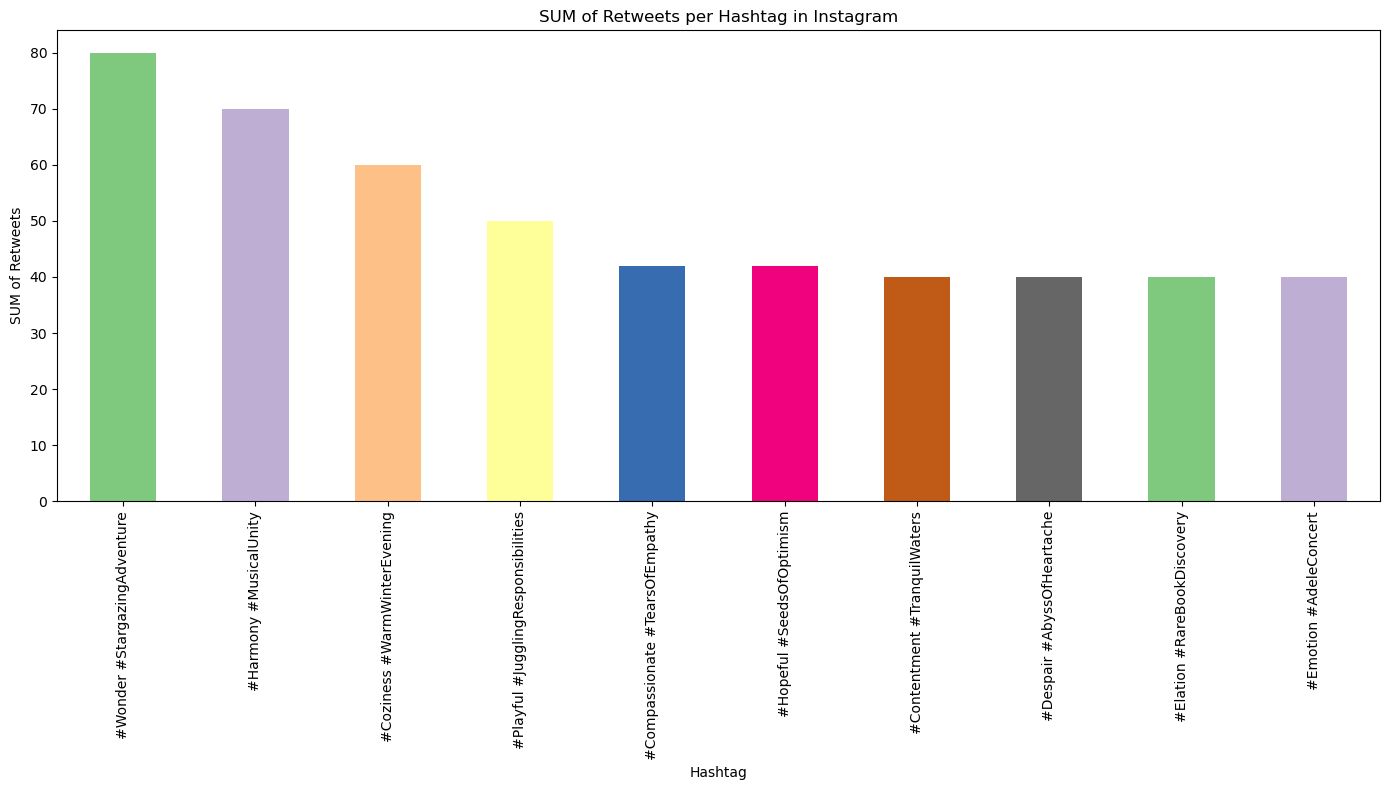

In [28]:
df_instagram = df[df['Platform'] == 'Instagram']
plt.figure(figsize=(14, 8))
df_instagram.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color=colors, 
                                                  xlabel='Hashtag', ylabel='SUM of Retweets', title='SUM of Retweets per Hashtag in Instagram')
plt.tight_layout()
plt.show()

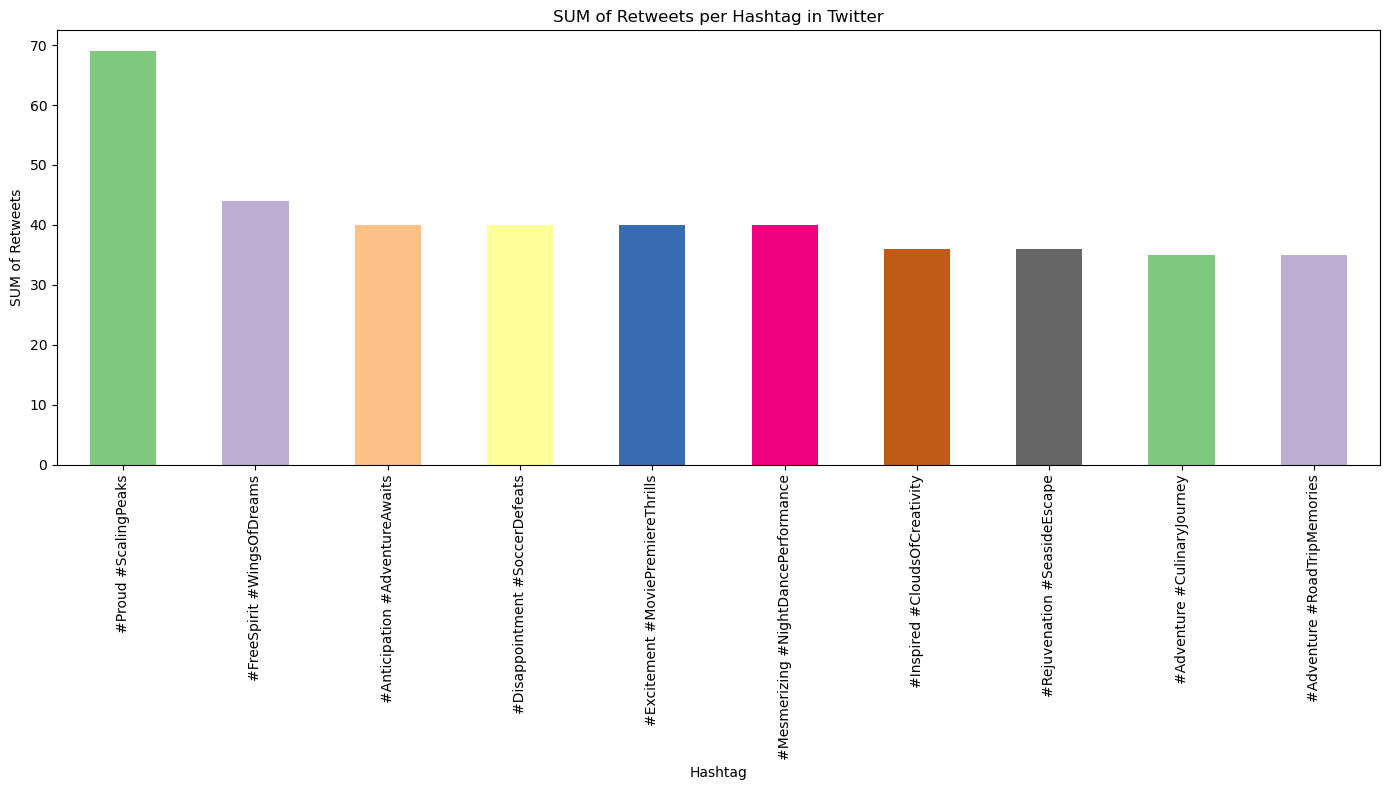

In [29]:
df_twitter = df[df['Platform'] == 'Twitter']
plt.figure(figsize=(14, 8))
df_twitter.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color=colors, 
                                                  xlabel='Hashtag', ylabel='SUM of Retweets', title='SUM of Retweets per Hashtag in Twitter')
plt.tight_layout()
plt.show()

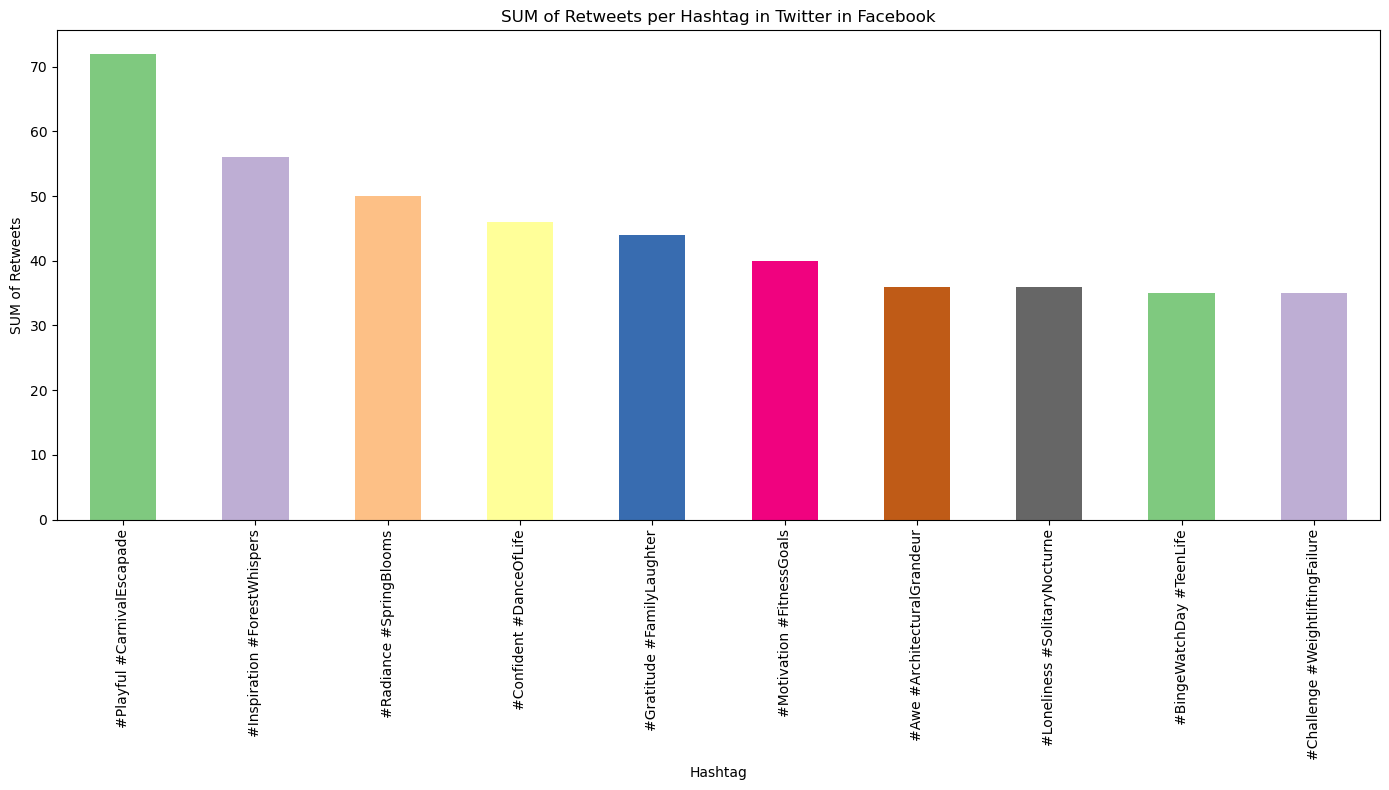

In [30]:
df_facebook = df[df['Platform'] == 'Facebook']
plt.figure(figsize=(14, 8))
df_facebook.groupby('Hashtags')['Retweets'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color=colors, 
                                                  xlabel='Hashtag', ylabel='SUM of Retweets', title='SUM of Retweets per Hashtag in Twitter in Facebook')
plt.tight_layout()
plt.show()

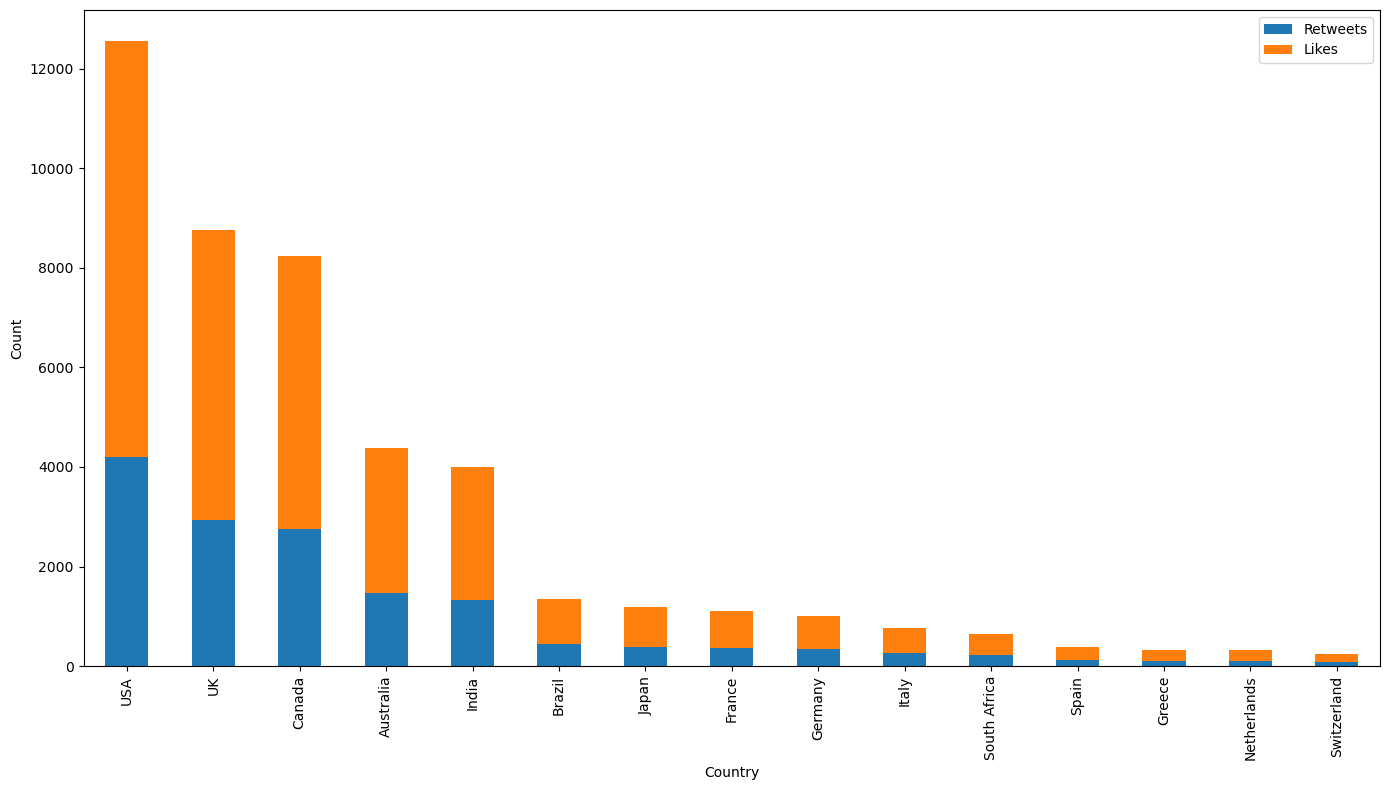

In [31]:
df.groupby('Country')[['Retweets','Likes']].sum().nlargest(columns='Retweets', n=15).plot(kind='bar', stacked=True, figsize=(14, 8), 
                                                       xlabel='Country', ylabel='Count')
plt.tight_layout()

In [32]:
grouped = df.groupby(['Platform','Year'])[['Retweets','Likes']].sum().reset_index()
grouped.head()

,Platform,Year,Retweets,Likes
0,Facebook,2011,47.0,95.0
1,Facebook,2012,30.0,60.0
2,Facebook,2013,22.0,45.0
3,Facebook,2015,214.0,425.0
4,Facebook,2016,374.0,740.0


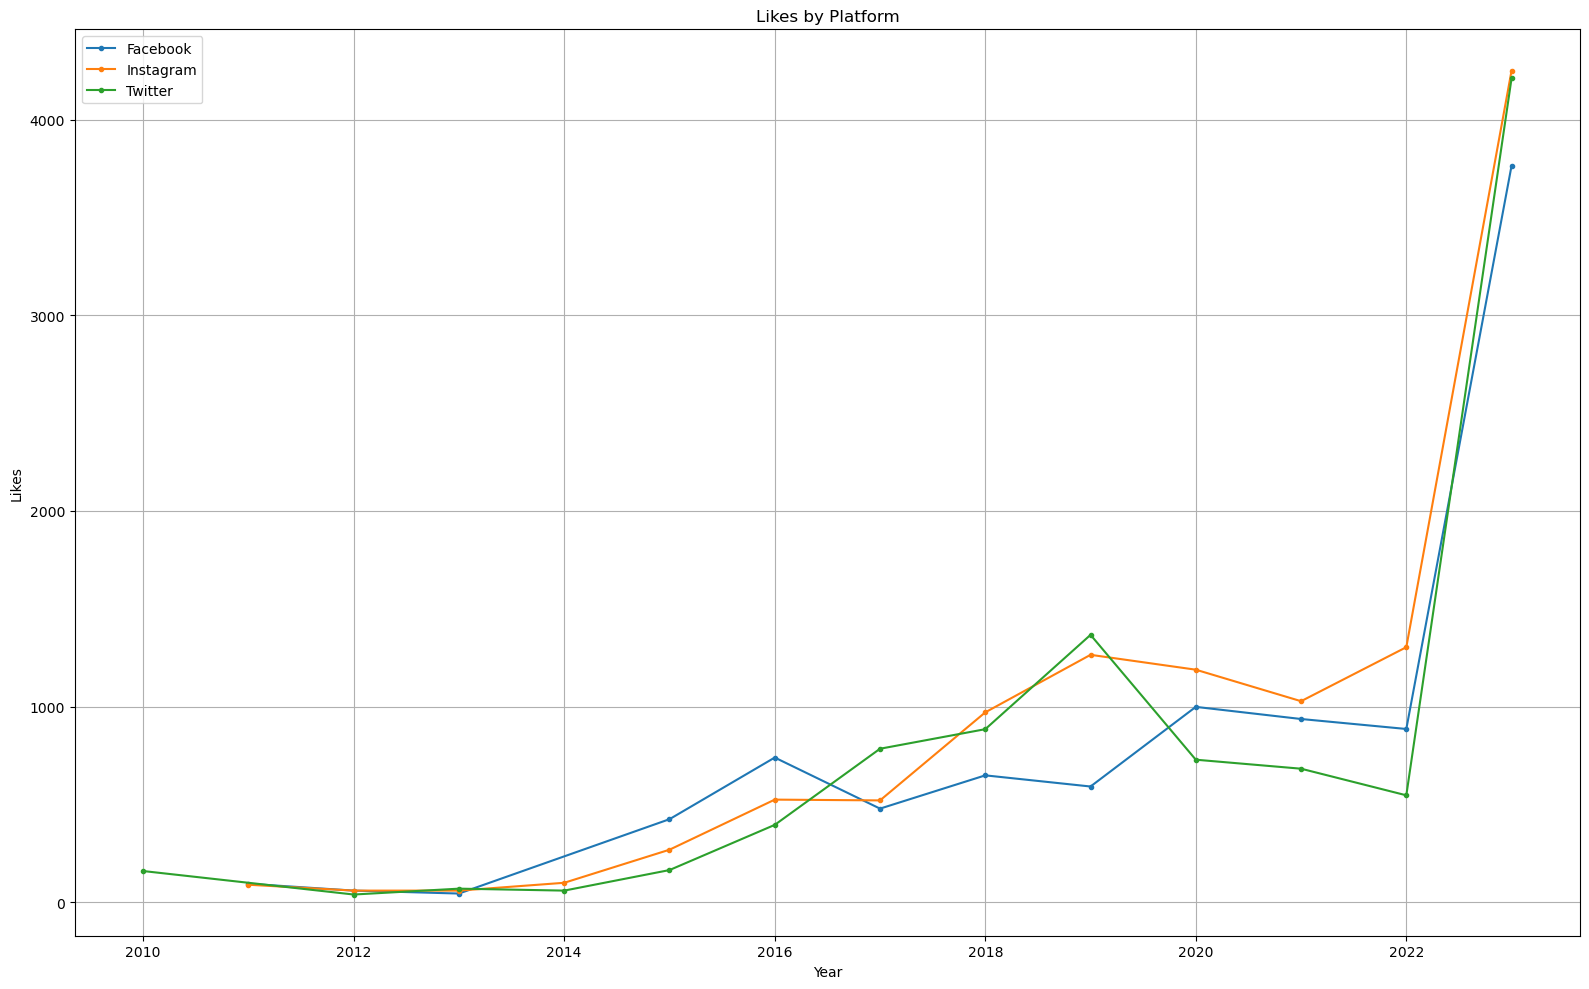

In [33]:
platforms = grouped.Platform.unique()
plt.figure(figsize=(16,10))
for plm in platforms: 
     pl = grouped[grouped['Platform'] == plm]
     plt.plot(pl.Year, pl.Likes, marker='.', label=plm)

plt.xlabel('Year')
plt.ylabel('Likes')
plt.title('Likes by Platform')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()